In [26]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
#from apyori import apriori
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px

In [2]:
df = pd.read_csv("H:\\study\\Association Rules\\Assignments\\my_movies.csv")

In [3]:
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [24]:
df_movies = df.iloc[:,5:]

In [25]:
df_movies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [27]:
frequencies_of_movies = apriori(df_movies,min_support=0.075,max_len=4,use_colnames=True)

In [57]:
frequencies_of_movies.style.background_gradient(cmap='Blues')

,support,itemsets
0,0.600000,frozenset({'Sixth Sense'})
1,0.700000,frozenset({'Gladiator'})
2,0.200000,frozenset({'LOTR1'})
3,0.200000,frozenset({'Harry Potter1'})
4,0.600000,frozenset({'Patriot'})
5,0.200000,frozenset({'LOTR2'})
6,0.100000,frozenset({'Harry Potter2'})
7,0.100000,frozenset({'LOTR'})
8,0.100000,frozenset({'Braveheart'})
9,0.200000,frozenset({'Green Mile'})


<ipython-input-59-bb4080651d92>:3: MatplotlibDeprecationWarning:

Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.



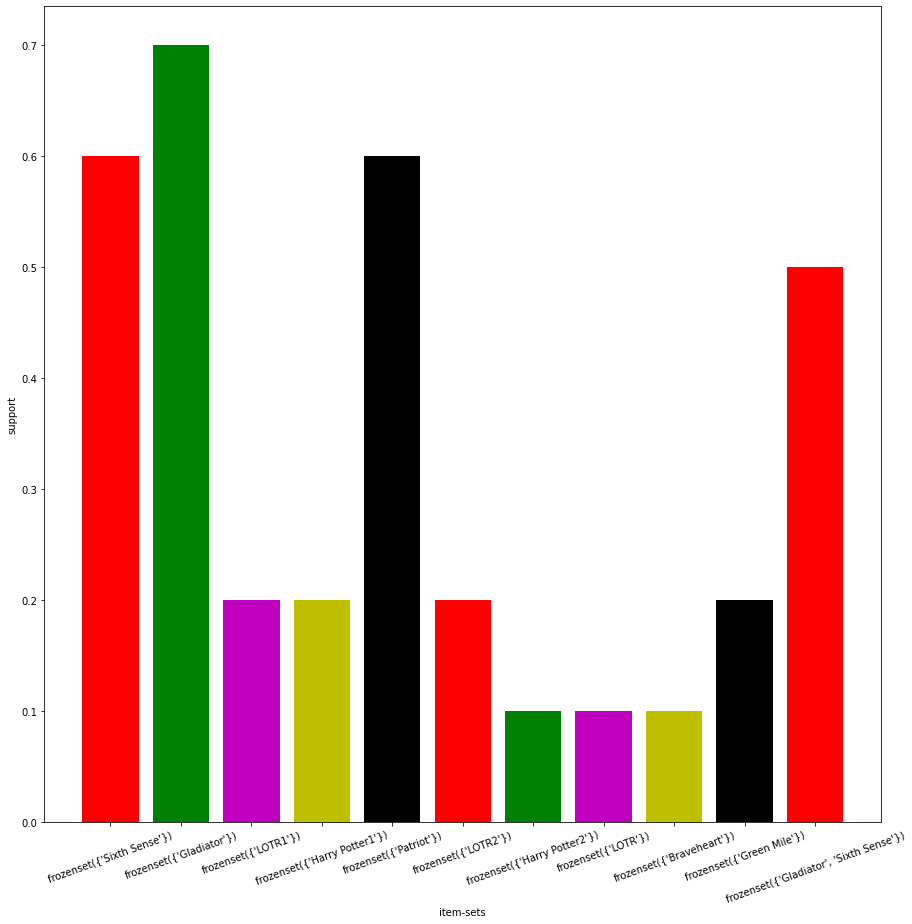

In [59]:
plt.figure(figsize=(15,15),)

plt.bar(x = list(range(0, 11)), height = frequencies_of_movies.support[0:11], color ='rgmyk')
plt.xticks(list(range(0, 11)), frequencies_of_movies.itemsets[0:11], rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [34]:
df_asso_rules = association_rules(frequencies_of_movies,metric='conviction',min_threshold=1)

In [62]:
cmap = df_asso_rules.style.background_gradient(cmap='Greens')

In [63]:
cmap

C:\Users\hp\anaconda3\lib\site-packages\pandas\io\formats\style.py:2817: RuntimeWarning:

invalid value encountered in double_scalars



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,frozenset({'Gladiator'}),frozenset({'Sixth Sense'}),0.700000,0.600000,0.500000,0.714286,1.190476,0.080000,1.400000
1,frozenset({'Sixth Sense'}),frozenset({'Gladiator'}),0.600000,0.700000,0.500000,0.833333,1.190476,0.080000,1.800000
2,frozenset({'Patriot'}),frozenset({'Sixth Sense'}),0.600000,0.600000,0.400000,0.666667,1.111111,0.040000,1.200000
3,frozenset({'Sixth Sense'}),frozenset({'Patriot'}),0.600000,0.600000,0.400000,0.666667,1.111111,0.040000,1.200000
4,frozenset({'LOTR'}),frozenset({'Sixth Sense'}),0.100000,0.600000,0.100000,1.000000,1.666667,0.040000,inf
5,frozenset({'Sixth Sense'}),frozenset({'LOTR'}),0.600000,0.100000,0.100000,0.166667,1.666667,0.040000,1.080000
6,frozenset({'Green Mile'}),frozenset({'Sixth Sense'}),0.200000,0.600000,0.200000,1.000000,1.666667,0.080000,inf
7,frozenset({'Sixth Sense'}),frozenset({'Green Mile'}),0.600000,0.200000,0.200000,0.333333,1.666667,0.080000,1.200000
8,frozenset({'Gladiator'}),frozenset({'Patriot'}),0.700000,0.600000,0.600000,0.857143,1.428571,0.180000,2.800000
9,frozenset({'Patriot'}),frozenset({'Gladiator'}),0.600000,0.700000,0.600000,1.000000,1.428571,0.180000,inf


In [51]:
px.scatter(df_asso_rules.iloc[:,2:],x='conviction',y='lift')

In [52]:
px.scatter(df_asso_rules.iloc[:,2:],x='support',y='confidence')